In [1]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
variables = pandas.read_csv('kerala.csv')
rain = variables['rain']

In [4]:
len(rain)

115

In [5]:
#ARIMA pickling for ndarrays (no dates, freq)
lnprice=np.log(rain)


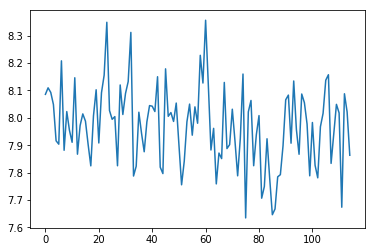

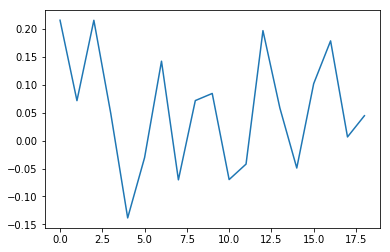

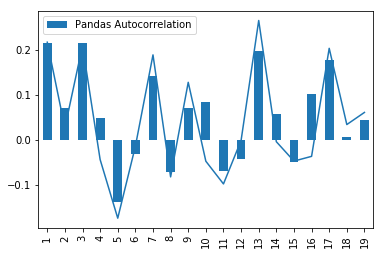

(-8.495006876601321,
 1.2829252996095163e-13,
 0,
 114,
 {'1%': -3.489057523907491,
  '10%': -2.5804808802708528,
  '5%': -2.887246327182993},
 -120.41763464859483)

In [4]:

plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result



/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


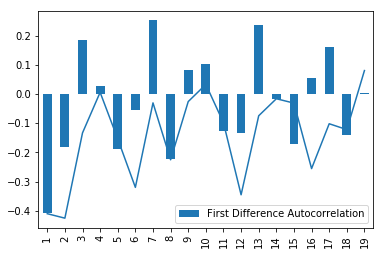

In [30]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [6]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(1,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())

/home/rajesh/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/rajesh/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/rajesh/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpr

In [7]:
model.dates=None
model.freq=None
model.missing=None

In [8]:
model_fit.save('model_arima.pkl')

In [9]:
from statsmodels.tsa.arima_model import ARIMAResults
loaded=ARIMAResults.load('model_arima.pkl')

In [10]:
predictions=loaded.predict(1,115 ,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

/home/rajesh/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([3243.34516303, 3287.18154656, 3286.11393601, 3179.21034852,
       2886.58829071, 2715.41668552, 3236.66465947, 3017.33099704,
       2873.42617037, 2922.21758173, 2769.29006575, 3128.93777469,
       2917.75399318, 2771.95201763, 2966.13029311, 2970.46552566,
       2793.71581394, 2576.5893346 , 2782.06791438, 3170.57251181,
       2936.66716186, 3025.91546808, 3387.05410712, 3898.70360841,
       3482.66685737, 2997.4959363 , 2975.97305913, 2686.0236157 ,
       2974.98321341, 3146.02786729, 3151.9706298 , 3336.36616284,
       3777.42483688, 2976.62907675, 2456.66020646, 2802.31617918,
       2900.99511423, 2701.27077488, 2803.79353544, 3036.30045122,
       3106.73974471, 3068.23185072, 3282.38081673, 2841.15604502,
       2450.06350595, 3045.28756951, 3209.60492584, 3015.55410789,
       2974.7051673 , 3055.07025272, 2870.24227545, 2473.27250695,
       2451.72973989, 2765.08813496, 3046.26942998, 2923.83398945,
       2968.79512592, 2988.23070171, 3379.0597024 , 3519.61256

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
mean_squared_error(price, predictionsadjusted)

44706.04832845986